# Ridge Regression

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
from sklearn.datasets import load_boston

In [3]:
df = load_boston()

D:\ineuron\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dataset (i.e.
    :func

In [4]:
df

{'data': array([[6.3200e-03, 1.8000e+01, 2.3100e+00, ..., 1.5300e+01, 3.9690e+02,
         4.9800e+00],
        [2.7310e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9690e+02,
         9.1400e+00],
        [2.7290e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9283e+02,
         4.0300e+00],
        ...,
        [6.0760e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
         5.6400e+00],
        [1.0959e-01, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9345e+02,
         6.4800e+00],
        [4.7410e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
         7.8800e+00]]),
 'target': array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
        18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
        15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
        13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
        21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
        35.4, 24.7, 3

**target = price of the house**

In [5]:
#Converting the dataframe and storing it in a dataset
dataset = pd.DataFrame(df.data)
print(dataset.head())

        0     1     2    3      4      5     6       7    8      9     10  \
0  0.00632  18.0  2.31  0.0  0.538  6.575  65.2  4.0900  1.0  296.0  15.3   
1  0.02731   0.0  7.07  0.0  0.469  6.421  78.9  4.9671  2.0  242.0  17.8   
2  0.02729   0.0  7.07  0.0  0.469  7.185  61.1  4.9671  2.0  242.0  17.8   
3  0.03237   0.0  2.18  0.0  0.458  6.998  45.8  6.0622  3.0  222.0  18.7   
4  0.06905   0.0  2.18  0.0  0.458  7.147  54.2  6.0622  3.0  222.0  18.7   

       11    12  
0  396.90  4.98  
1  396.90  9.14  
2  392.83  4.03  
3  394.63  2.94  
4  396.90  5.33  


**Above features are all the independent features**<br>
**Dependent feature is the target featue of the dataset**

In [6]:
#Assign the column names using feature_names

dataset.columns = df.feature_names

In [7]:
dataset.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [8]:
#Now considering the dependent feature(target)

df.target.shape

(506,)

In [7]:
dataset['Price'] = df.target

In [10]:
dataset.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Price
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


**We can observe the dependent feature Price in the above displayed dataset**

In [8]:
X = dataset.iloc[:,:-1]  ## Independen Feature
y = dataset.iloc[:,-1]   ## Dependent Feature

In [9]:
from sklearn.model_selection import train_test_split
X, X_test, y, y_test = train_test_split(
    X, y, test_size=0.33, random_state=42)


## Ridge Regression

In [17]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV



In [65]:
#Initialize the ridge object

ridge = Ridge()

In [22]:
ridge

Ridge()

In [24]:
ridge.fit(X,y)

Ridge()

In [25]:
#X - independent feature
#y - dependent feature

In [26]:
print(ridge.coef_)

[-1.04595278e-01  4.74432243e-02 -8.80467889e-03  2.55239322e+00
 -1.07770146e+01  3.85400020e+00 -5.41453810e-03 -1.37265353e+00
  2.90141589e-01 -1.29116463e-02 -8.76074394e-01  9.67327945e-03
 -5.33343225e-01]


In [27]:
print(ridge.intercept_)

31.597669818273985


In [30]:
## Prediction for the test data
reg_pred = ridge.predict(X_test)

In [31]:
reg_pred

array([28.78596821, 35.85691003, 13.24586045, 24.35585884, 18.92453713,
       22.15782911, 17.5867192 , 13.53870147, 22.17128747, 20.61997096,
       24.35138154, 18.82155521, -4.41798623, 20.69957277, 19.40189243,
       25.46642115, 20.19862996,  6.42332067, 40.745516  , 17.8140489 ,
       27.36972148, 30.20460155, 11.53723803, 23.9459692 , 18.41312853,
       15.76906728, 21.93315055, 15.50644244, 21.80009712, 19.34781614,
       22.57347501, 25.02558249, 25.34203597, 18.9282955 , 16.32023868,
       18.53621121, 30.53232402, 20.66053013, 23.16321498, 23.8371262 ,
       14.1505575 , 32.56694035, 42.99177036, 17.16191352, 27.01627565,
       17.37193075, 14.34902491, 25.00985187, 19.70046697, 30.25311604,
       21.50541027, 34.14868517, 15.96917368, 25.65227414, 39.56376099,
       22.12126818, 19.19231116, 33.42417844, 24.69924957, 13.18294303,
       22.8694662 , 31.50946541, 31.35528002, 16.62180745, 20.93159193,
       16.2900651 , 20.42202882, 25.98863394, 31.50726633, 12.90

Text(0, 0.5, 'Test Predicted Data')

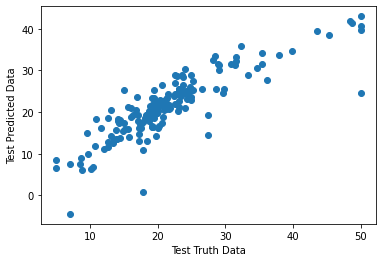

In [32]:
###1 Assumptions of Liner Regression
plt.scatter(y_test,reg_pred)
plt.xlabel("Test Truth Data")
plt.ylabel("Test Predicted Data")

In [33]:
# 2 Residuals
residuals = y_test-reg_pred

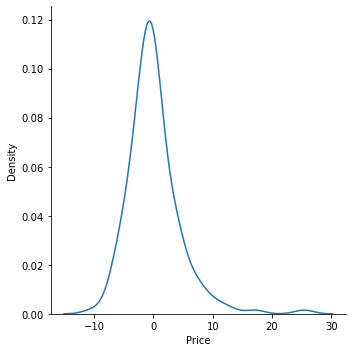

In [34]:
sns.displot(residuals,kind='kde')

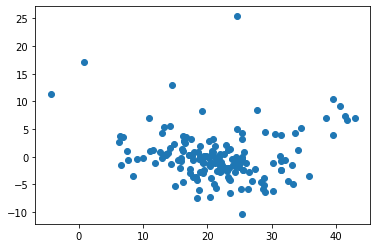

In [35]:
#3 scatter plot with predictions and residual
# uniform distribution
#Homoscedasticity
plt.scatter(reg_pred,residuals)

In [36]:
#performance metrics
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
print(mean_squared_error(y_test,reg_pred))
print(mean_absolute_error(y_test,reg_pred))
print(np.sqrt(mean_squared_error(y_test,reg_pred)))

19.31564883702412
2.981180766256502
4.394957205368913


In [37]:
## Rsquare and adjusted R square


from sklearn.metrics import r2_score
score = r2_score(y_test,reg_pred)
print(score)

0.7447670514070412


In [38]:
#Adjusted R square
## Adjusted R square
#display adjusted R-squared
1 - (1-score)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)

0.7230805917226721

In order to implement Ridge Regression we need lambda value which is found out by using Cross Validation. <br>
So for that purpose GridSearchCV is used from sklearn library. 

In [66]:
# 'alpha' is the parameter required inside Ridge, we are providing various range of values to alpha(alpha>0)

parameters = {'alpha':[1e-15,1e-10,1e-8,1e-3,1e-2,1,5,10,20,30,35,40,45,50,55,100]}

In [67]:
# Initializing GridSearchCV

ridge_regressor = GridSearchCV(ridge,parameters,scoring='neg_mean_squared_error', cv = 5)
ridge_regressor.fit(X,y)

GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [1e-15, 1e-10, 1e-08, 0.001, 0.01, 1, 5, 10,
                                   20, 30, 35, 40, 45, 50, 55, 100]},
             scoring='neg_mean_squared_error')

In [68]:
print(ridge_regressor.best_params_)
print(ridge_regressor.best_score_)

{'alpha': 0.01}
-25.186899367386978


**best_params_ is used to depict which lambda value was suitable for calculatin the best score which is 100 in this case**

# Lasso Regression

In [69]:
from sklearn.linear_model import Lasso

In [70]:
regression = Lasso()

In [41]:
regression

Lasso()

In [43]:
#we are applying the formula but we are not changing the data
regression.fit(X,y)

#X_train - independent feature
#y_train - dependent feature

Lasso()

In [44]:
print(regression.coef_)

[-0.07842771  0.03504406 -0.          0.         -0.          1.13102167
  0.00772442 -0.64811663  0.18629574 -0.00941185 -0.7018402   0.01109515
 -0.78553954]


In [45]:
print(regression.intercept_)

38.313870512923614


In [46]:
## Prediction for the test data
reg_pred = regression.predict(X_test)

In [47]:
reg_pred

array([28.27969746, 32.59891928, 14.7049039 , 26.20005615, 18.94293125,
       22.16081906, 17.93493945, 12.03265198, 22.03616227, 21.21874353,
       21.03827102, 20.11461837, -4.50932025, 21.17780704, 21.85319683,
       23.74788504, 19.99261369,  6.5613725 , 36.88911764, 18.06166546,
       27.94778828, 29.36303563, 12.03014726, 24.32435619, 19.32008641,
       16.67011683, 23.62250292, 13.68865944, 19.12045513, 20.80646453,
       22.96515855, 26.25193907, 22.82188581, 23.71555189, 14.79375286,
       21.63530696, 30.48577377, 23.2678558 , 20.66941211, 24.64390688,
       14.89642313, 30.48242121, 38.04819085, 19.49528973, 26.84370434,
       18.6913546 , 15.63382728, 25.56686094, 19.26352798, 31.387381  ,
       23.45972099, 32.96829976, 16.1102449 , 25.68682617, 37.13696601,
       23.00499314, 19.7601628 , 32.52564707, 24.90605433, 15.40516887,
       23.90824688, 31.05425556, 31.32272922, 19.38443928, 25.02153757,
       13.93429767, 19.52006703, 26.95357165, 31.40641375, 12.92

Text(0, 0.5, 'Test Predicted Data')

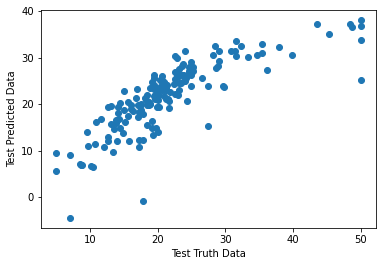

In [48]:
###1 Assumptions of Liner Regression
plt.scatter(y_test,reg_pred)
plt.xlabel("Test Truth Data")
plt.ylabel("Test Predicted Data")

In [49]:
# 2 Residuals
residuals = y_test-reg_pred

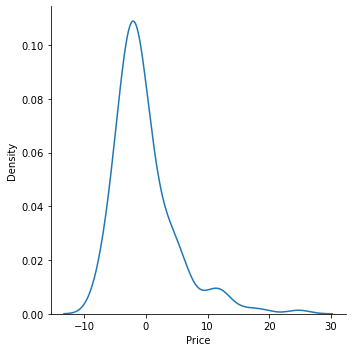

In [50]:
sns.displot(residuals,kind='kde')

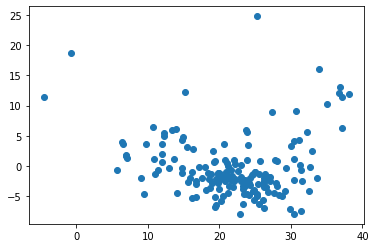

In [51]:
#3 scatter plot with predictions and residual
# uniform distribution
#Homoscedasticity
plt.scatter(reg_pred,residuals)

In [52]:
#performance metrics
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
print(mean_squared_error(y_test,reg_pred))
print(mean_absolute_error(y_test,reg_pred))
print(np.sqrt(mean_squared_error(y_test,reg_pred)))

25.37228092990278
3.663378444619082
5.037090522305786


In [53]:
## Rsquare and adjusted R square


from sklearn.metrics import r2_score
score = r2_score(y_test,reg_pred)
print(score)

0.6647359801936796


In [54]:
#Adjusted R square
## Adjusted R square
#display adjusted R-squared
1 - (1-score)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)

0.636249494850659

In [71]:
from sklearn.model_selection import GridSearchCV


In [72]:
parameters = {'alpha':[1e-15,1e-10,1e-8,1e-3,1e-2,1,5,10,20,30,35,40,45,50,55,100]}
lasso_regressor = GridSearchCV(regression,parameters,scoring='neg_mean_squared_error', cv = 5)

In [73]:
lasso_regressor.fit(X,y)
print(lasso_regressor.best_params_)
print(lasso_regressor.best_score_)

D:\ineuron\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.720e+03, tolerance: 2.284e+00
  model = cd_fast.enet_coordinate_descent(
D:\ineuron\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.028e+03, tolerance: 2.493e+00
  model = cd_fast.enet_coordinate_descent(
D:\ineuron\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.538e+03, tolerance: 2.160e+00
  model = cd_fast.enet_coordi

{'alpha': 1e-15}
-25.187874739285043


D:\ineuron\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.611e+03, tolerance: 2.988e+00
  model = cd_fast.enet_coordinate_descent(


In [74]:
#Predicting values

prediction_ridge = ridge_regressor.predict(X_test)
prediction_lasso = lasso_regressor.predict(X_test)

D:\ineuron\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Price', ylabel='Density'>

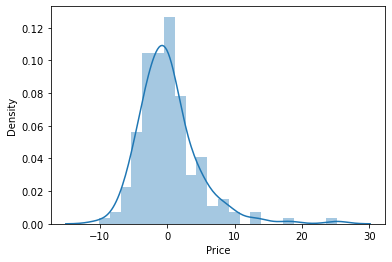

In [75]:
#using distance plotting

sns.distplot(y_test-prediction_lasso)

D:\ineuron\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Price', ylabel='Density'>

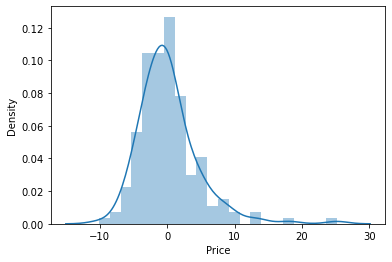

In [76]:
sns.distplot(y_test-prediction_ridge)

**observations**<br>
By looking at the above two plots there is no much different in the prediction.<br>
But if there are very large values Lasso gives better score when compared to Ridge Regression.

# ElasticNet Regression

Allows balance of both L1 AND L2 penalties which can result in better performance of the model.

In [78]:
dataset.corr()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Price
CRIM,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,-0.385064,0.455621,-0.388305
ZN,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995,0.360445
INDUS,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800,-0.483725
CHAS,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929,0.175260
NOX,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879,-0.427321
RM,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808,0.695360
AGE,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339,-0.376955
DIS,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996,0.249929
RAD,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676,-0.381626
TAX,0.582764,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.543993,-0.468536


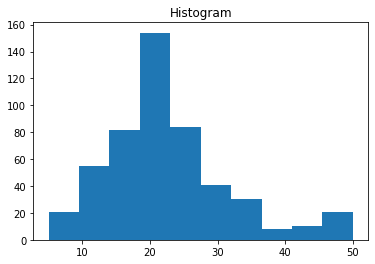

In [79]:
plt.hist(dataset['Price'])
plt.title("Histogram")
plt.show()

**observation:**<br>
Most of the distribution of the target variable of the dataset is in the range from 10 to 30

In [82]:
dataset.columns

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT', 'Price'],
      dtype='object')

In [84]:
pip install mlxtend

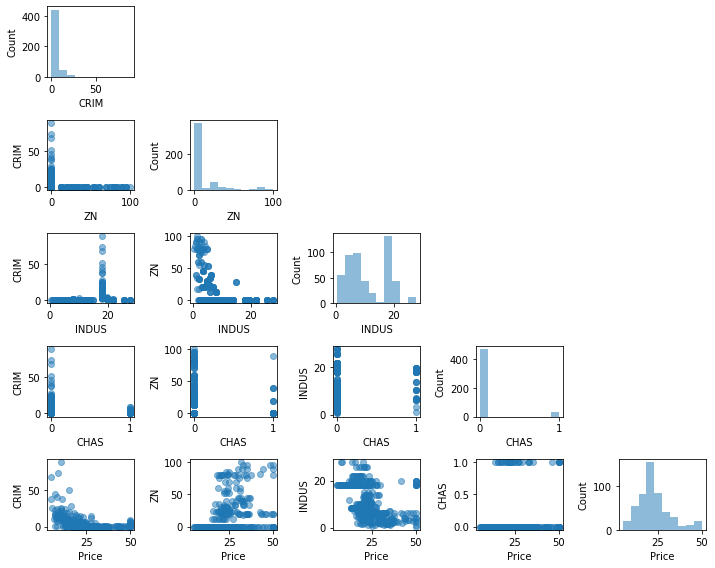

In [10]:
from mlxtend.plotting import scatterplotmatrix
cols = ['CRIM', 'ZN', 'INDUS', 'CHAS','Price']
scatterplotmatrix(dataset[cols].values, figsize = (10,8), names = cols, alpha = 0.5)
plt.tight_layout()
plt.show()

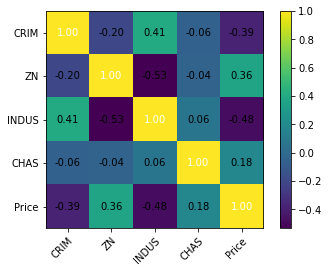

In [11]:
from mlxtend.plotting import heatmap
cm = np.corrcoef(dataset[cols].values.T)
hm = heatmap(cm, row_names = cols,column_names = cols)
plt.show()

In [12]:
from sklearn.linear_model import ElasticNet
#object is saved in a variable env

env = ElasticNet(alpha = 1.0, l1_ratio = 0.5)

In [14]:
env.fit(X,y)

ElasticNet()

In [15]:
y_pred = env.predict(X_test)

In [16]:
y_pred

array([28.45116261, 32.88118535, 13.94022368, 26.0290827 , 19.10209322,
       21.91577356, 17.84384372, 11.73802876, 22.1861771 , 21.18894714,
       21.23283833, 19.99575434, -5.07894194, 20.8453665 , 21.80937474,
       23.84995614, 20.21574929,  6.68989914, 37.23919623, 18.14927357,
       28.09054063, 29.64980704, 11.79978084, 24.17811115, 19.52949427,
       16.86417743, 23.40881242, 13.64867547, 19.09300213, 20.7694649 ,
       23.21177857, 26.1668262 , 22.66553234, 24.09960941, 14.95757465,
       21.7470041 , 30.28177268, 23.28008532, 20.61202507, 24.43279873,
       14.87287769, 30.95879004, 38.5774165 , 19.22424254, 26.8323026 ,
       18.93052593, 15.47652475, 25.341711  , 19.39852798, 31.38089987,
       23.40355852, 33.19416976, 15.87572654, 25.47731152, 37.49394824,
       23.08164102, 19.95742888, 32.91466888, 24.80374072, 15.19010302,
       23.74677345, 31.23272792, 31.53994039, 19.30778071, 24.45398565,
       13.94201344, 19.64232903, 26.94797445, 31.72887821, 13.07

In [17]:
print("Slope: %.2f" % env.coef_[0])

Slope: -0.10


In [18]:
print("Intercept: %.2f" % env.intercept_)

Intercept: 40.51


In [19]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test, y_pred)

25.037514107521513

In [20]:
#root mean squared error

np.sqrt(mean_squared_error(y_test, y_pred))

5.0037500044987775

Mean squared error and root mean squarred error is used to check the evaluation matrix of the model.